In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
file_path = 'data/2006_urbanintensity_2.xlsx'
df = pd.read_excel(file_path)

In [4]:
df

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Area_of_Land_Requisition_this_Year,Arable_Land,Road_Surface_Area_Per_Capita_m2,Name_of_Regions.1,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts
0,NationalTotal,2006,1944984.0,64719.0,6107,166533.51,33288.68,3984.06,33659.76,31765.70,...,1396.48,680.49,11.04,NationalTotal,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,NaN,1254.23,1254.23,...,NaN,NaN,7.40,Beijing,1197.60,905.38,1.42,78702835.0,110000.0,16405.0
2,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,NaN,539.98,539.98,...,45.88,21.45,13.98,Tianjin,948.89,571.04,3.04,43591500.0,120000.0,11924.0
3,Hebei,2006,31588.0,2570.0,146,5926.16,1332.82,115.43,1416.97,1314.94,...,43.86,29.33,12.38,Hebei,6939.12,2108.54,14.36,NaN,NaN,NaN
4,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31,174.96,176.19,...,16,15.82,9.12,Shijiazhuang,939.50,378.49,13.87,20266320.0,130100.0,14058.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,0.65,0.55,18.80,Guyuan,151.23,18.60,28.66,519279.0,640400.0,10524.0
317,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,2.34,2.02,19.12,Zhongwei,104.19,25.92,21.27,750050.0,640500.0,13659.0
318,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.4,673.87,703.73,...,5.63,1.21,12.13,xinjiang,234.16,190.71,1.04,30452600.0,650000.0,1630586.0
319,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,NaN,235.88,235.88,...,0.36,NaN,7.30,Urumuchi,201.84,158.74,1.46,6543019.0,650100.0,13793.0


In [5]:
# 去除指定列中包含NaN值的行
columns_to_check = [ 
    'Total_population_of_the_region', 
    'First_sector_of_GDP', 
    'GDP', 
    'Citycode', 
    'Area_of_administrative_districts'
]
df_cleaned = df.dropna(subset=columns_to_check)


In [6]:
df_cleaned

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Area_of_Land_Requisition_this_Year,Arable_Land,Road_Surface_Area_Per_Capita_m2,Name_of_Regions.1,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts
1,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,NaN,1254.23,1254.23,...,NaN,NaN,7.40,Beijing,1197.60,905.38,1.42,78702835.0,110000.0,16405.0
2,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,NaN,539.98,539.98,...,45.88,21.45,13.98,Tianjin,948.89,571.04,3.04,43591500.0,120000.0,11924.0
4,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31,174.96,176.19,...,16,15.82,9.12,Shijiazhuang,939.50,378.49,13.87,20266320.0,130100.0,14058.0
5,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,1.18,1.07,12.31,Tangshan,719.12,229.30,11.65,23621410.0,130200.0,13808.0
6,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,NaN,NaN,13.52,Qinhuangdao,280.54,117.73,10.44,5520509.0,130300.0,7792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,0.65,0.55,18.80,Guyuan,151.23,18.60,28.66,519279.0,640400.0,10524.0
317,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,2.34,2.02,19.12,Zhongwei,104.19,25.92,21.27,750050.0,640500.0,13659.0
318,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.4,673.87,703.73,...,5.63,1.21,12.13,xinjiang,234.16,190.71,1.04,30452600.0,650000.0,1630586.0
319,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,NaN,235.88,235.88,...,0.36,NaN,7.30,Urumuchi,201.84,158.74,1.46,6543019.0,650100.0,13793.0


In [7]:
# 指定需要检查NaN值的列
columns_to_check = [
    'UrbanPopulation',
    'UrbanTemporaryPopulation', 
    'Total_population_of_the_region', 
    'First_sector_of_GDP', 
    'GDP', 
    'Citycode', 
    'Area_of_administrative_districts',
    'Road_Surface_Area_Per_Capita_m2',
    'UrbanArea'
]

# 将这些列转换为数值类型，处理非数值内容
for column in columns_to_check:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

/tmp/ipykernel_1900/2476692969.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')


# PUI

In [8]:
# 将 UrbanTemporaryPopulation 列中的 NaN 值替换为 0
df['UrbanTemporaryPopulation'].fillna(0, inplace=True)

In [9]:
# 计算并新建PUI列
df_cleaned['PUI'] = (df_cleaned['Non-agricultural population']) / df_cleaned['Total_population_of_the_region']

/tmp/ipykernel_1900/1351632447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PUI'] = (df_cleaned['Non-agricultural population']) / df_cleaned['Total_population_of_the_region']


In [10]:
df_cleaned

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Arable_Land,Road_Surface_Area_Per_Capita_m2,Name_of_Regions.1,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI
1,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,NaN,1254.23,1254.23,...,NaN,7.40,Beijing,1197.60,905.38,1.42,78702835.0,110000.0,16405.0,0.755995
2,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,NaN,539.98,539.98,...,21.45,13.98,Tianjin,948.89,571.04,3.04,43591500.0,120000.0,11924.0,0.601798
4,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31.00,174.96,176.19,...,15.82,9.12,Shijiazhuang,939.50,378.49,13.87,20266320.0,130100.0,14058.0,0.402863
5,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,1.07,12.31,Tangshan,719.12,229.30,11.65,23621410.0,130200.0,13808.0,0.318862
6,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,NaN,13.52,Qinhuangdao,280.54,117.73,10.44,5520509.0,130300.0,7792.0,0.419655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,0.55,18.80,Guyuan,151.23,18.60,28.66,519279.0,640400.0,10524.0,0.122991
317,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,2.02,19.12,Zhongwei,104.19,25.92,21.27,750050.0,640500.0,13659.0,0.248776
318,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.40,673.87,703.73,...,1.21,12.13,xinjiang,234.16,190.71,1.04,30452600.0,650000.0,1630586.0,0.814443
319,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,NaN,235.88,235.88,...,NaN,7.30,Urumuchi,201.84,158.74,1.46,6543019.0,650100.0,13793.0,0.786465


In [11]:
pui_info = df_cleaned['PUI'].describe()

print(pui_info)

count    292.000000
mean       0.350538
std        0.189930
min        0.080718
25%        0.212618
50%        0.297482
75%        0.454857
max        1.000000
Name: PUI, dtype: float64


In [12]:
# 查找 PUI 列中缺失值的行
missing_pui_rows = df_cleaned[df_cleaned['PUI'].isnull()]
missing_pui_rows

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Arable_Land,Road_Surface_Area_Per_Capita_m2,Name_of_Regions.1,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI
282,Chuxiong,2006,NaN,NaN,NaN,53.2,42.42,0.0,NaN,NaN,...,NaN,10.7,Chuxiong,267.2,NaN,26.0,2174240.0,532300.0,28436.0,NaN


# URI

In [13]:
# 将 UrbanTemporaryPopulation 列的空值设置为 0
df_cleaned['UrbanTemporaryPopulation'].fillna(0, inplace=True)


/tmp/ipykernel_1900/153050996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['UrbanTemporaryPopulation'].fillna(0, inplace=True)


In [14]:
df_cleaned['URI'] = (df_cleaned['Road_Surface_Area_Per_Capita_m2'] * ((df_cleaned['UrbanPopulation'] + df_cleaned['UrbanTemporaryPopulation'])* 10000) /1000000 ) / df_cleaned['Area_of_administrative_districts']

/tmp/ipykernel_1900/2660692400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['URI'] = (df_cleaned['Road_Surface_Area_Per_Capita_m2'] * ((df_cleaned['UrbanPopulation'] + df_cleaned['UrbanTemporaryPopulation'])* 10000) /1000000 ) / df_cleaned['Area_of_administrative_districts']


In [15]:
df_cleaned

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Road_Surface_Area_Per_Capita_m2,Name_of_Regions.1,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI,URI
1,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,0.00,1254.23,1254.23,...,7.40,Beijing,1197.60,905.38,1.42,78702835.0,110000.0,16405.0,0.755995,0.006013
2,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,0.00,539.98,539.98,...,13.98,Tianjin,948.89,571.04,3.04,43591500.0,120000.0,11924.0,0.601798,0.006653
4,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31.00,174.96,176.19,...,9.12,Shijiazhuang,939.50,378.49,13.87,20266320.0,130100.0,14058.0,0.402863,0.001466
5,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,12.31,Tangshan,719.12,229.30,11.65,23621410.0,130200.0,13808.0,0.318862,0.001753
6,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,13.52,Qinhuangdao,280.54,117.73,10.44,5520509.0,130300.0,7792.0,0.419655,0.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,18.80,Guyuan,151.23,18.60,28.66,519279.0,640400.0,10524.0,0.122991,0.000328
317,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,19.12,Zhongwei,104.19,25.92,21.27,750050.0,640500.0,13659.0,0.248776,0.000217
318,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.40,673.87,703.73,...,12.13,xinjiang,234.16,190.71,1.04,30452600.0,650000.0,1630586.0,0.814443,0.000040
319,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,0.00,235.88,235.88,...,7.30,Urumuchi,201.84,158.74,1.46,6543019.0,650100.0,13793.0,0.786465,0.001068


In [16]:
uri_info = df_cleaned['URI'].describe()

print(uri_info)

count    293.000000
mean       0.001585
std        0.004714
min        0.000004
25%        0.000192
50%        0.000534
75%        0.001477
max        0.064822
Name: URI, dtype: float64


In [17]:
# 查找 URI 列值超过 1 的行
uri_above_1 = df_cleaned[df_cleaned['URI'] > 1]
uri_above_1

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Road_Surface_Area_Per_Capita_m2,Name_of_Regions.1,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI,URI


#  LUI

In [18]:
df_cleaned['LUI'] = (df_cleaned['Surface_Area_of_Built_District']) / df_cleaned['Area_of_administrative_districts']

/tmp/ipykernel_1900/3353621859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LUI'] = (df_cleaned['Surface_Area_of_Built_District']) / df_cleaned['Area_of_administrative_districts']


In [19]:
df_cleaned

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Name_of_Regions.1,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI,URI,LUI
1,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,0.00,1254.23,1254.23,...,Beijing,1197.60,905.38,1.42,78702835.0,110000.0,16405.0,0.755995,0.006013,0.076454
2,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,0.00,539.98,539.98,...,Tianjin,948.89,571.04,3.04,43591500.0,120000.0,11924.0,0.601798,0.006653,0.045285
4,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31.00,174.96,176.19,...,Shijiazhuang,939.50,378.49,13.87,20266320.0,130100.0,14058.0,0.402863,0.001466,0.012446
5,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,Tangshan,719.12,229.30,11.65,23621410.0,130200.0,13808.0,0.318862,0.001753,0.015144
6,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,Qinhuangdao,280.54,117.73,10.44,5520509.0,130300.0,7792.0,0.419655,0.001498,0.010603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,Guyuan,151.23,18.60,28.66,519279.0,640400.0,10524.0,0.122991,0.000328,0.003006
317,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,Zhongwei,104.19,25.92,21.27,750050.0,640500.0,13659.0,0.248776,0.000217,0.001413
318,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.40,673.87,703.73,...,xinjiang,234.16,190.71,1.04,30452600.0,650000.0,1630586.0,0.814443,0.000040,0.000413
319,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,0.00,235.88,235.88,...,Urumuchi,201.84,158.74,1.46,6543019.0,650100.0,13793.0,0.786465,0.001068,0.017101


In [20]:
lui_info = df_cleaned['LUI'].describe()

print(lui_info)

count    292.000000
mean       0.011941
std        0.029484
min        0.000065
25%        0.002103
50%        0.004835
75%        0.012178
max        0.370499
Name: LUI, dtype: float64


# EUI

In [21]:
df_cleaned['EUI'] = 1 - (df_cleaned['First_sector_of_GDP']) / 100

/tmp/ipykernel_1900/1051056126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['EUI'] = 1 - (df_cleaned['First_sector_of_GDP']) / 100


In [22]:
df_cleaned

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,Total_population_of_the_region,Non-agricultural population,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI,URI,LUI,EUI
1,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,0.00,1254.23,1254.23,...,1197.60,905.38,1.42,78702835.0,110000.0,16405.0,0.755995,0.006013,0.076454,0.9858
2,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,0.00,539.98,539.98,...,948.89,571.04,3.04,43591500.0,120000.0,11924.0,0.601798,0.006653,0.045285,0.9696
4,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31.00,174.96,176.19,...,939.50,378.49,13.87,20266320.0,130100.0,14058.0,0.402863,0.001466,0.012446,0.8613
5,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,719.12,229.30,11.65,23621410.0,130200.0,13808.0,0.318862,0.001753,0.015144,0.8835
6,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,280.54,117.73,10.44,5520509.0,130300.0,7792.0,0.419655,0.001498,0.010603,0.8956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,151.23,18.60,28.66,519279.0,640400.0,10524.0,0.122991,0.000328,0.003006,0.7134
317,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,104.19,25.92,21.27,750050.0,640500.0,13659.0,0.248776,0.000217,0.001413,0.7873
318,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.40,673.87,703.73,...,234.16,190.71,1.04,30452600.0,650000.0,1630586.0,0.814443,0.000040,0.000413,0.9896
319,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,0.00,235.88,235.88,...,201.84,158.74,1.46,6543019.0,650100.0,13793.0,0.786465,0.001068,0.017101,0.9854


In [23]:
df_cleaned['EUI'].describe()


count    293.000000
mean       0.826176
std        0.102502
min        0.552900
25%        0.741000
50%        0.836400
75%        0.918000
max        0.998000
Name: EUI, dtype: float64

# EAL

In [24]:
df_cleaned['EAL'] = df_cleaned['GDP'] / df_cleaned['Area_of_administrative_districts']

/tmp/ipykernel_1900/3615482750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['EAL'] = df_cleaned['GDP'] / df_cleaned['Area_of_administrative_districts']


In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 1 to 320
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Name_of_Regions                           293 non-null    object 
 1   Year                                      293 non-null    int64  
 2   UrbanDistrictArea                         292 non-null    float64
 3   UrbanDistrictPopulation                   292 non-null    float64
 4   UrbanDistrictTemporaryPopulation          265 non-null    object 
 5   UrbanArea                                 293 non-null    float64
 6   UrbanPopulation                           293 non-null    float64
 7   UrbanTemporaryPopulation                  293 non-null    float64
 8   Surface_Area_of_Built_District            292 non-null    float64
 9   Area_of_Urban_Construction_Land_Subtotal  289 non-null    float64
 10  Residential                               2

In [26]:
df_cleaned['EAL'].describe()

count      293.000000
mean       981.426824
std       2272.186237
min          2.378372
25%        186.213143
50%        393.732172
75%        920.268720
max      29920.547607
Name: EAL, dtype: float64

# LUL

In [27]:
# 导入 land_use_intensity_by_city2006.csv 数据
df_land_use = pd.read_csv("data/land_use_intensity_by_city2006.csv", encoding='ISO-8859-1')

In [28]:
df_land_use

,Citycode,Provincecode,Province,City,LUL
0,110000.0,110000.0,±±¾©ÊÐ,±±¾©ÊÐ,264.527306
1,120000.0,120000.0,Ìì½òÊÐ,Ìì½òÊÐ,297.691218
2,130100.0,130000.0,ºÓ±±Ê¡,Ê¯¼Ò×¯ÊÐ,283.814306
3,130200.0,130000.0,ºÓ±±Ê¡,ÌÆÉ½ÊÐ,293.597938
4,130300.0,130000.0,ºÓ±±Ê¡,ÇØ»ÊµºÊÐ,264.204125
...,...,...,...,...,...
365,659009.0,650000.0,ÐÂ½®Î¬Îá¶û×ÔÖÎÇø,À¥ÓñÊÐ,104.023058
366,659010.0,650000.0,ÐÂ½®Î¬Îá¶û×ÔÖÎÇø,ºúÑîºÓÊÐ,238.313187
367,710000.0,710000.0,Ì¨ÍåÊ¡,Ì¨ÍåÊ¡,230.894538
368,810000.0,810000.0,Ïã¸ÛÌØ±ðÐÐÕþÇø,Ïã¸ÛÌØ±ðÐÐÕþÇø,221.366624


In [29]:
df_land_useProvince = pd.read_csv("data/land_use_intensity_by_province.csv", encoding='ISO-8859-1')

In [30]:
df_combined = pd.concat([df_land_use, df_land_useProvince], ignore_index=True)

In [31]:
df_merged = df_cleaned.merge(df_combined[['Citycode', 'LUL']], on='Citycode', how='left')

In [32]:
df_merged

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI,URI,LUI,EUI,EAL,LUL
0,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,0.00,1254.23,1254.23,...,1.42,78702835.0,110000.0,16405.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306
1,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,0.00,539.98,539.98,...,3.04,43591500.0,120000.0,11924.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218
2,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31.00,174.96,176.19,...,13.87,20266320.0,130100.0,14058.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306
3,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,11.65,23621410.0,130200.0,13808.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938
4,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,10.44,5520509.0,130300.0,7792.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,28.66,519279.0,640400.0,10524.0,0.122991,0.000328,0.003006,0.7134,49.342360,240.457458
289,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,21.27,750050.0,640500.0,13659.0,0.248776,0.000217,0.001413,0.7873,54.912512,204.353408
290,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.40,673.87,703.73,...,1.04,30452600.0,650000.0,1630586.0,0.814443,0.000040,0.000413,0.9896,18.675863,64.695860
291,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,0.00,235.88,235.88,...,1.46,6543019.0,650100.0,13793.0,0.786465,0.001068,0.017101,0.9854,474.372435,138.926754


In [33]:
df_merged['LUL'].describe()

count    293.000000
mean     250.449555
std       44.876019
min       27.135322
25%      226.074872
50%      246.872486
75%      285.180222
max      319.352971
Name: LUL, dtype: float64

In [34]:
# 指定需要检查 NaN 值的列
columns_to_check1 = ['URI', 'LUI', 'EUI', 'EAL']

# 查找这些列中包含 NaN 值的行
rows_with_nan = df_merged[df_merged[columns_to_check1].isna().any(axis=1)]



rows_with_nan

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI,URI,LUI,EUI,EAL,LUL
258,Chuxiong,2006,NaN,NaN,NaN,53.2,42.42,0.0,NaN,NaN,...,26.0,2174240.0,532300.0,28436.0,NaN,0.00016,NaN,0.74,76.460824,211.488945


In [35]:
# 指定需要检查NaN值的列
columns_to_check1 = ['URI', 'LUI', 'EUI', 'EAL']

# 去除这些列中包含NaN值的行
data_merged = df_merged.dropna(subset=columns_to_check1)

In [36]:
data_merged

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,First_sector_of_GDP,GDP,Citycode,Area_of_administrative_districts,PUI,URI,LUI,EUI,EAL,LUL
0,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,0.00,1254.23,1254.23,...,1.42,78702835.0,110000.0,16405.0,0.755995,0.006013,0.076454,0.9858,4797.490704,264.527306
1,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,0.00,539.98,539.98,...,3.04,43591500.0,120000.0,11924.0,0.601798,0.006653,0.045285,0.9696,3655.778262,297.691218
2,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31.00,174.96,176.19,...,13.87,20266320.0,130100.0,14058.0,0.402863,0.001466,0.012446,0.8613,1441.621852,283.814306
3,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,11.65,23621410.0,130200.0,13808.0,0.318862,0.001753,0.015144,0.8835,1710.704664,293.597938
4,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,10.44,5520509.0,130300.0,7792.0,0.419655,0.001498,0.010603,0.8956,708.484215,264.204125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,28.66,519279.0,640400.0,10524.0,0.122991,0.000328,0.003006,0.7134,49.342360,240.457458
289,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,21.27,750050.0,640500.0,13659.0,0.248776,0.000217,0.001413,0.7873,54.912512,204.353408
290,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.40,673.87,703.73,...,1.04,30452600.0,650000.0,1630586.0,0.814443,0.000040,0.000413,0.9896,18.675863,64.695860
291,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,0.00,235.88,235.88,...,1.46,6543019.0,650100.0,13793.0,0.786465,0.001068,0.017101,0.9854,474.372435,138.926754


In [38]:
# 保留所需的列
columns_to_keep = ['Name_of_Regions', 'Year', 'Citycode', 'PUI', 'URI', 'LUI', 'EUI', 'EAL', 'LUL']
ui_index_2006 = data_merged[columns_to_keep]

# 导出为 CSV 文件
ui_index_2006.to_csv('data/UI_index_2006.csv', index=False)

# 熵权法

In [ ]:
#标准化

In [37]:
# Initialize a column for the normalized values
data_merged['X1_star'] = pd.Series(dtype='float')
column_to_normalize = 'PUI'
# Iterate over each year to perform the normalization
for year in range(2006, 2007):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X1_max = year_data[column_to_normalize].max()
    X1_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X1_star'] = (year_data[column_to_normalize] - X1_min) / (X1_max - X1_min)

# Check the results
print(data_merged[['Year', 'Name_of_Regions', 'PUI', 'X1_star']].head())

   Year Name_of_Regions       PUI   X1_star
0  2006         Beijing  0.755995  0.734570
1  2006         Tianjin  0.601798  0.566834
2  2006    Shijiazhuang  0.402863  0.350431
3  2006        Tangshan  0.318862  0.259054
4  2006     Qinhuangdao  0.419655  0.368698


/tmp/ipykernel_188/2485316065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged['X1_star'] = pd.Series(dtype='float')


In [120]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 292
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Name_of_Regions                           292 non-null    object 
 1   Year                                      292 non-null    int64  
 2   UrbanDistrictArea                         292 non-null    float64
 3   UrbanDistrictPopulation                   292 non-null    float64
 4   UrbanDistrictTemporaryPopulation          265 non-null    object 
 5   UrbanArea                                 292 non-null    float64
 6   UrbanPopulation                           292 non-null    float64
 7   UrbanTemporaryPopulation                  292 non-null    float64
 8   Surface_Area_of_Built_District            292 non-null    float64
 9   Area_of_Urban_Construction_Land_Subtotal  289 non-null    float64
 10  Residential                               2

In [38]:
# Initialize a column for the normalized values
data_merged['X2_star'] = pd.Series(dtype='float')
column_to_normalize = 'URI'
# Iterate over each year to perform the normalization
for year in range(2006, 2007):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X2_max = year_data[column_to_normalize].max()
    X2_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X2_star'] = (year_data[column_to_normalize] - X2_min) / (X2_max - X2_min)

data_merged['X3_star'] = pd.Series(dtype='float')
column_to_normalize = 'LUI'
# Iterate over each year to perform the normalization
for year in range(2006, 2007):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X3_max = year_data[column_to_normalize].max()
    X3_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X3_star'] = (year_data[column_to_normalize] - X3_min) / (X3_max - X3_min)

data_merged['X4_star'] = pd.Series(dtype='float')
column_to_normalize = 'EUI'
# Iterate over each year to perform the normalization
for year in range(2006, 2007):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X4_max = year_data[column_to_normalize].max()
    X4_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X4_star'] = (year_data[column_to_normalize] - X4_min) / (X4_max - X4_min)

data_merged['X5_star'] = pd.Series(dtype='float')
column_to_normalize = 'EAL'
# Iterate over each year to perform the normalization
for year in range(2006, 2007):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X5_max = year_data[column_to_normalize].max()
    X5_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X5_star'] = (year_data[column_to_normalize] - X5_min) / (X5_max - X5_min)



data_merged['X6_star'] = pd.Series(dtype='float')
column_to_normalize = 'LUL'
# Iterate over each year to perform the normalization
for year in range(2006, 2007):  # Including 2021
    # Filter the DataFrame for the current year
    year_data = data_merged[data_merged['Year'] == year]
    
    # Calculate the max and min values for the current year
    X6_max = year_data[column_to_normalize].max()
    X6_min = year_data[column_to_normalize].min()
    
    # Apply the normalization formula for the current year
    data_merged.loc[data_merged['Year'] == year, 'X6_star'] = (year_data[column_to_normalize] - X6_min) / (X6_max - X6_min)

/tmp/ipykernel_188/990721949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged['X2_star'] = pd.Series(dtype='float')
/tmp/ipykernel_188/990721949.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged['X3_star'] = pd.Series(dtype='float')
/tmp/ipykernel_188/990721949.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [122]:
data_merged

,Name_of_Regions,Year,UrbanDistrictArea,UrbanDistrictPopulation,UrbanDistrictTemporaryPopulation,UrbanArea,UrbanPopulation,UrbanTemporaryPopulation,Surface_Area_of_Built_District,Area_of_Urban_Construction_Land_Subtotal,...,LUI,EUI,EAL,LUL,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,2006,16411.0,1581.0,NaN,12187.34,1333.00,0.00,1254.23,1254.23,...,0.076454,0.9858,4797.490704,264.527306,0.734570,0.092698,0.206215,0.972590,0.160274,0.812381
1,Tianjin,2006,7399.0,778.0,NaN,2190.82,567.45,0.00,539.98,539.98,...,0.045285,0.9696,3655.778262,297.691218,0.566834,0.102572,0.122074,0.936194,0.122113,0.925871
2,Shijiazhuang,2006,456.0,231.0,31,212.54,195.05,31.00,174.96,176.19,...,0.012446,0.8613,1441.621852,283.814306,0.350431,0.022555,0.033422,0.692878,0.048106,0.878383
3,Tangshan,2006,3874.0,300.0,10,1230.20,187.07,9.51,209.11,203.12,...,0.015144,0.8835,1710.704664,293.597938,0.259054,0.026969,0.040707,0.742754,0.057100,0.911864
4,Qinhuangdao,2006,363.0,79.0,7,363.20,78.87,7.49,82.62,82.62,...,0.010603,0.8956,708.484215,264.204125,0.368698,0.023049,0.028448,0.769939,0.023601,0.811275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Guyuan,2006,4489.0,50.0,3,31.64,15.72,2.63,31.64,24.43,...,0.003006,0.7134,49.342360,240.457458,0.045985,0.004988,0.007941,0.360593,0.001570,0.730011
289,Zhongwei,2006,4685.0,35.0,4,52.00,15.30,0.23,19.30,18.60,...,0.001413,0.7873,54.912512,204.353408,0.182815,0.003284,0.003639,0.526623,0.001756,0.606459
290,xinjiang,2006,238986.0,740.0,56,991.81,488.49,47.40,673.87,703.73,...,0.000413,0.9896,18.675863,64.695860,0.798150,0.000546,0.000940,0.981128,0.000545,0.128536
291,Urumuchi,2006,10901.0,202.0,NaN,235.88,201.83,0.00,235.88,235.88,...,0.017101,0.9854,474.372435,138.926754,0.767715,0.016411,0.045991,0.971692,0.015776,0.382562


In [39]:
columns_to_keep = ['Name_of_Regions','Citycode','Year','X1_star','X2_star','X3_star','X4_star','X5_star','X6_star']
data_process = data_merged[columns_to_keep]

In [40]:
data_process

,Name_of_Regions,Citycode,Year,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star
0,Beijing,110000.0,2006,0.734570,0.092698,0.206215,0.972590,0.160274,0.812381
1,Tianjin,120000.0,2006,0.566834,0.102572,0.122074,0.936194,0.122113,0.925871
2,Shijiazhuang,130100.0,2006,0.350431,0.022555,0.033422,0.692878,0.048106,0.878383
3,Tangshan,130200.0,2006,0.259054,0.026969,0.040707,0.742754,0.057100,0.911864
4,Qinhuangdao,130300.0,2006,0.368698,0.023049,0.028448,0.769939,0.023601,0.811275
...,...,...,...,...,...,...,...,...,...
288,Guyuan,640400.0,2006,0.045985,0.004988,0.007941,0.360593,0.001570,0.730011
289,Zhongwei,640500.0,2006,0.182815,0.003284,0.003639,0.526623,0.001756,0.606459
290,xinjiang,650000.0,2006,0.798150,0.000546,0.000940,0.981128,0.000545,0.128536
291,Urumuchi,650100.0,2006,0.767715,0.016411,0.045991,0.971692,0.015776,0.382562


In [41]:
#1.7熵权法

def calculate_entropy(indicator_data):
    # Replace zero values to avoid log(0) and negative infinity in entropy calculation
    indicator_data = indicator_data.replace(0, np.finfo(float).eps)  # Use a small number instead of zero
    p_ij = indicator_data / indicator_data.sum()  # Calculate the proportion p_ij
    K = 1 / np.log(292)  # Calculate the constant K
    e_j = -K * (p_ij * np.log(p_ij)).sum()  # Calculate the entropy e_j
    return e_j

# Initialize an empty list to store DataFrames for each year
dataframes_list = []

# Calculate entropies and weights for each year
for year in range(2006, 2007):
    year_data = data_process[data_process['Year'] == year].copy()
    entropies = year_data[['X1_star', 'X2_star', 'X3_star', 'X4_star','X5_star','X6_star']].apply(calculate_entropy, axis=0)
    weights = (1 - entropies) / (1 - entropies).sum()  # Calculate weights, ensuring they sum up to 1 within the year
    for i, indicator in enumerate(['X1_star', 'X2_star', 'X3_star', 'X4_star','X5_star','X6_star']):
        year_data[indicator + '_weighted'] = year_data[indicator] * weights.values[i]  # Apply weights to the indicators
    dataframes_list.append(year_data)  # Append the yearly data to the list

# Concatenate all DataFrames in the list to create the comprehensive_scores DataFrame
comprehensive_scores = pd.concat(dataframes_list, ignore_index=True)

# Now you should have the comprehensive_scores DataFrame with correctly calculated weights per year

In [42]:
comprehensive_scores

,Name_of_Regions,Citycode,Year,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star,X1_star_weighted,X2_star_weighted,X3_star_weighted,X4_star_weighted,X5_star_weighted,X6_star_weighted
0,Beijing,110000.0,2006,0.734570,0.092698,0.206215,0.972590,0.160274,0.812381,0.047897,0.032281,0.058670,0.021754,0.043682,0.005793
1,Tianjin,120000.0,2006,0.566834,0.102572,0.122074,0.936194,0.122113,0.925871,0.036960,0.035720,0.034731,0.020940,0.033281,0.006603
2,Shijiazhuang,130100.0,2006,0.350431,0.022555,0.033422,0.692878,0.048106,0.878383,0.022850,0.007855,0.009509,0.015497,0.013111,0.006264
3,Tangshan,130200.0,2006,0.259054,0.026969,0.040707,0.742754,0.057100,0.911864,0.016892,0.009392,0.011582,0.016613,0.015562,0.006503
4,Qinhuangdao,130300.0,2006,0.368698,0.023049,0.028448,0.769939,0.023601,0.811275,0.024041,0.008027,0.008094,0.017221,0.006432,0.005785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Guyuan,640400.0,2006,0.045985,0.004988,0.007941,0.360593,0.001570,0.730011,0.002998,0.001737,0.002259,0.008065,0.000428,0.005206
288,Zhongwei,640500.0,2006,0.182815,0.003284,0.003639,0.526623,0.001756,0.606459,0.011920,0.001144,0.001035,0.011779,0.000479,0.004325
289,xinjiang,650000.0,2006,0.798150,0.000546,0.000940,0.981128,0.000545,0.128536,0.052043,0.000190,0.000268,0.021945,0.000148,0.000917
290,Urumuchi,650100.0,2006,0.767715,0.016411,0.045991,0.971692,0.015776,0.382562,0.050059,0.005715,0.013085,0.021734,0.004300,0.002728


In [43]:
# Calculate the combined weighted values for Resistance, Adaptability, and Recovery
comprehensive_scores['PU'] = comprehensive_scores['X1_star_weighted'] + comprehensive_scores['X2_star_weighted']
comprehensive_scores['LU'] = comprehensive_scores['X3_star_weighted'] + comprehensive_scores['X6_star_weighted']
#comprehensive_scores['ADA'] = comprehensive_scores['X2_star_weighted'] 
comprehensive_scores['EU'] = comprehensive_scores['X4_star_weighted'] + comprehensive_scores['X5_star_weighted']

# Assuming data_merged is the DataFrame with the standardized 'RES', 'ADA', and 'REC' columns.

# Define a small positive value to add to REC to avoid zero values
small_positive_value = 1e-6

# Replace zero values in REC with the small positive value
comprehensive_scores['PU_adj'] = comprehensive_scores['PU'].replace(0, small_positive_value)
comprehensive_scores['LU_adj'] = comprehensive_scores['LU'].replace(0, small_positive_value)
comprehensive_scores['EU_adj'] = comprehensive_scores['EU'].replace(0, small_positive_value)

# Now, the UER values should not be zero due to REC being zero, since we have adjusted REC values slightly above zero.

# Calculate the Urban Ecological Resilience (UER) for each borough and year
comprehensive_scores['UI'] = comprehensive_scores['PU_adj'] + comprehensive_scores['LU_adj'] + comprehensive_scores['EU_adj']

# Check the result
comprehensive_scores[['Year', 'Name_of_Regions', 'PU', 'LU', 'EU', 'UI']].head()

,Year,Name_of_Regions,PU,LU,EU,UI
0,2006,Beijing,0.080179,0.064464,0.065435,0.210078
1,2006,Tianjin,0.072680,0.041334,0.054221,0.168235
2,2006,Shijiazhuang,0.030705,0.015773,0.028608,0.075086
3,2006,Tangshan,0.026283,0.018084,0.032175,0.076543
4,2006,Qinhuangdao,0.032067,0.013879,0.023653,0.069600


In [44]:
comprehensive_scores['UI'].describe()

count    292.000000
mean       0.064927
std        0.077111
min        0.009415
25%        0.032701
50%        0.048187
75%        0.072984
max        0.999075
Name: UI, dtype: float64

In [45]:
top_10_ui = comprehensive_scores.nlargest(10, 'UI')
top_10_ui

,Name_of_Regions,Citycode,Year,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star,X1_star_weighted,...,X4_star_weighted,X5_star_weighted,X6_star_weighted,PU,LU,EU,PU_adj,LU_adj,EU_adj,UI
189,Shenzhen,440300.0,2006,1.000000,1.000000,1.000000,1.000000,1.000000,0.870264,0.065205,...,0.022367,0.272543,0.006206,0.413448,0.290717,0.294910,0.413448,0.290717,0.294910,0.999075
203,Dongguan,441900.0,2006,0.367327,0.368198,0.669882,0.984273,0.358246,0.944652,0.023951,...,0.022015,0.097638,0.006737,0.152174,0.197325,0.119653,0.152174,0.197325,0.119653,0.469152
67,Shanghai,310000.0,2006,0.845124,0.411341,0.287970,0.984723,0.429863,0.923607,0.055106,...,0.022025,0.117156,0.006587,0.198353,0.088517,0.139181,0.198353,0.088517,0.139181,0.426051
190,Zhuhai,440400.0,2006,1.000000,0.340163,0.184552,0.936194,0.158195,0.741518,0.065205,...,0.020940,0.043115,0.005288,0.183664,0.057795,0.064055,0.183664,0.057795,0.064055,0.305514
187,Guangzhou,440100.0,2006,0.664930,0.185171,0.291614,0.947652,0.281299,0.797340,0.043356,...,0.021196,0.076666,0.005686,0.107841,0.088653,0.097862,0.107841,0.088653,0.097862,0.294357
109,Xiamen,350200.0,2006,0.653134,0.159987,0.269778,0.957762,0.247013,0.799486,0.042587,...,0.021422,0.067322,0.005701,0.098302,0.082456,0.088744,0.098302,0.082456,0.088744,0.269502
68,Nanjing,320100.0,2006,0.756689,0.173111,0.235487,0.929903,0.140692,0.914930,0.049340,...,0.020799,0.038345,0.006525,0.109624,0.073523,0.059144,0.109624,0.073523,0.059144,0.242291
191,Shantou,440500.0,2006,0.990096,0.169100,0.205855,0.851045,0.113134,0.826765,0.064559,...,0.019035,0.030834,0.005896,0.123447,0.064464,0.049869,0.123447,0.064464,0.049869,0.237780
69,Wuxi,320200.0,2006,0.698798,0.163590,0.115102,0.965850,0.238452,0.895677,0.045565,...,0.021603,0.064988,0.006387,0.102534,0.039135,0.086591,0.102534,0.039135,0.086591,0.228260
192,Foshan,440600.0,2006,1.000000,0.076402,0.093626,0.933049,0.257751,0.885708,0.065205,...,0.020869,0.070248,0.006316,0.091811,0.032954,0.091117,0.091811,0.032954,0.091117,0.215882


In [46]:
rows_with_nan = comprehensive_scores[comprehensive_scores.isna().any(axis=1)]
rows_with_nan

,Name_of_Regions,Citycode,Year,X1_star,X2_star,X3_star,X4_star,X5_star,X6_star,X1_star_weighted,...,X4_star_weighted,X5_star_weighted,X6_star_weighted,PU,LU,EU,PU_adj,LU_adj,EU_adj,UI


In [47]:
# 导出comprehensive_scores数据框为Excel文件
output_excel_path = 'data/test_2006_UI.xlsx'
comprehensive_scores.to_excel(output_excel_path, index=False)

1.地图显示

In [99]:
# 读取shapefile
shapefile_path = 'data/Chinamap_2019/Municipalities_isoprojections.dbf'
gdf = gpd.read_file(shapefile_path)

In [73]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   省代码       371 non-null    int64   
 1   省         371 non-null    object  
 2   市代码       371 non-null    int64   
 3   市         371 non-null    object  
 4   类型        371 non-null    object  
 5   area      371 non-null    int64   
 6   geometry  371 non-null    geometry
dtypes: geometry(1), int64(3), object(3)
memory usage: 20.4+ KB


In [100]:
comprehensive_scores['Citycode'] = comprehensive_scores['Citycode'].astype(int)

In [94]:
# 确保gdf的'市代码'列也是整数类型
gdf['市代码'] = gdf['市代码'].astype(int)

In [101]:
# 根据Citycode和市代码进行连接，保留不匹配的行
data_merged = gdf.merge(comprehensive_scores, left_on='市代码', right_on='Citycode', how='outer')

In [79]:
data_merged

,省代码,省,市代码,市,类型,area,geometry,Name_of_Regions,Citycode,Year,...,X3_star_weighted,X4_star_weighted,X5_star_weighted,PU,LU,EU,PU_adj,LU_adj,EU_adj,UI
0,110000,北京市,110000,北京市,直辖市,16405,"POLYGON ((964331.264 4474013.823, 964404.983 4...",Beijing,110000.0,2006.0,...,0.013745,0.000112,0.004012,0.006542,0.013745,0.004124,0.006542,0.013745,0.004124,0.007185
1,120000,天津市,120000,天津市,直辖市,11924,"POLYGON ((1038619.974 4393375.738, 1039708.385...",Tianjin,120000.0,2006.0,...,0.003396,0.000108,0.003055,0.005761,0.003396,0.003163,0.005761,0.003396,0.003163,0.003955
2,130000,河北省,130100,石家庄市,地级市,14058,"POLYGON ((752440.575 4193018.280, 753133.436 4...",Shijiazhuang,130100.0,2006.0,...,0.000275,0.000080,0.001199,0.001482,0.000275,0.001279,0.001482,0.000275,0.001279,0.000805
3,130000,河北省,130200,唐山市,地级市,13808,"MULTIPOLYGON (((1173558.861 4280993.640, 11731...",Tangshan,130200.0,2006.0,...,0.001644,0.000086,0.001425,0.001749,0.001644,0.001511,0.001749,0.001644,0.001511,0.001631
4,130000,河北省,130300,秦皇岛市,地级市,7792,"POLYGON ((1174489.844 4452888.356, 1174512.478...",Qinhuangdao,130300.0,2006.0,...,0.000858,0.000089,0.000585,0.001661,0.000858,0.000674,0.001661,0.000858,0.000674,0.000986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,650000,新疆维吾尔自治区,659009,昆玉市,省直辖县,1109,"MULTIPOLYGON (((-2096392.229 4133044.937, -209...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,650000,新疆维吾尔自治区,659010,胡杨河市,省直辖县,938,"POLYGON ((-1579322.536 5036220.633, -1579403.1...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,710000,台湾省,710000,台湾省,不统计,36200,"MULTIPOLYGON (((1725282.722 2422889.823, 17253...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,810000,香港特别行政区,810000,香港特别行政区,特别行政区,1115,"MULTIPOLYGON (((926766.217 2342789.464, 926841...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# 修改列名称“省代码”为“province”
data_merged = data_merged.rename(columns={'省代码': 'Provincecode'})
# 修改列名称“省代码”为“province”
data_merged = data_merged.rename(columns={'省': 'Province'})
# 修改列名称“省代码”为“province”
data_merged = data_merged.rename(columns={'市代码': 'Citycode1'})
data_merged = data_merged.rename(columns={'市': 'City'})
data_merged = data_merged.rename(columns={'类型': 'Type'})

In [103]:
data_merged

,Provincecode,Province,Citycode1,City,Type,area,geometry,Name_of_Regions,Citycode,Year,...,X3_star_weighted,X4_star_weighted,X5_star_weighted,PU,LU,EU,PU_adj,LU_adj,EU_adj,UI
0,110000,北京市,110000,北京市,直辖市,16405,"POLYGON ((964331.264 4474013.823, 964404.983 4...",Beijing,110000.0,2006.0,...,0.013745,0.000112,0.004012,0.006542,0.013745,0.004124,0.006542,0.013745,0.004124,0.007185
1,120000,天津市,120000,天津市,直辖市,11924,"POLYGON ((1038619.974 4393375.738, 1039708.385...",Tianjin,120000.0,2006.0,...,0.003396,0.000108,0.003055,0.005761,0.003396,0.003163,0.005761,0.003396,0.003163,0.003955
2,130000,河北省,130100,石家庄市,地级市,14058,"POLYGON ((752440.575 4193018.280, 753133.436 4...",Shijiazhuang,130100.0,2006.0,...,0.000275,0.000080,0.001199,0.001482,0.000275,0.001279,0.001482,0.000275,0.001279,0.000805
3,130000,河北省,130200,唐山市,地级市,13808,"MULTIPOLYGON (((1173558.861 4280993.640, 11731...",Tangshan,130200.0,2006.0,...,0.001644,0.000086,0.001425,0.001749,0.001644,0.001511,0.001749,0.001644,0.001511,0.001631
4,130000,河北省,130300,秦皇岛市,地级市,7792,"POLYGON ((1174489.844 4452888.356, 1174512.478...",Qinhuangdao,130300.0,2006.0,...,0.000858,0.000089,0.000585,0.001661,0.000858,0.000674,0.001661,0.000858,0.000674,0.000986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,650000,新疆维吾尔自治区,659009,昆玉市,省直辖县,1109,"MULTIPOLYGON (((-2096392.229 4133044.937, -209...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,650000,新疆维吾尔自治区,659010,胡杨河市,省直辖县,938,"POLYGON ((-1579322.536 5036220.633, -1579403.1...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,710000,台湾省,710000,台湾省,不统计,36200,"MULTIPOLYGON (((1725282.722 2422889.823, 17253...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,810000,香港特别行政区,810000,香港特别行政区,特别行政区,1115,"MULTIPOLYGON (((926766.217 2342789.464, 926841...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# 将data_merged导出为新的shapefile
output_shapefile_path = 'data/Chinamap_2019/output_data_merged.shp'
data_merged.to_file(output_shapefile_path, driver='ESRI Shapefile')

/tmp/ipykernel_256/850693808.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  data_merged.to_file(output_shapefile_path, driver='ESRI Shapefile')


/tmp/ipykernel_256/140812280.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, ticks=np.arange(len(labels)))


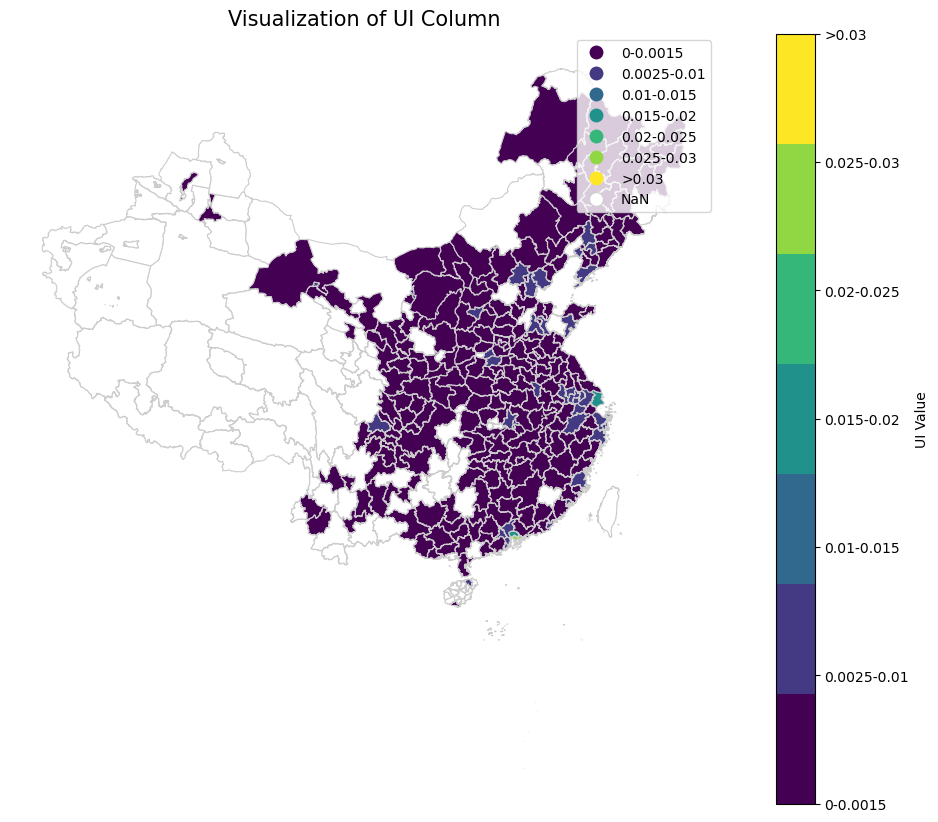

In [87]:
# 设置UI列的NaN值为-1，以便进行颜色映射
data_merged['UI'] = data_merged['UI'].fillna(-1)

# 使用pd.cut将UI列分为不同的等级
bins = [0, 0.0015, 0.01, 0.015, 0.02, 0.025, 0.03, np.inf]
labels = ['0-0.0015', '0.0025-0.01', '0.01-0.015', '0.015-0.02', '0.02-0.025', '0.025-0.03', '>0.03']
data_merged['UI_category'] = pd.cut(data_merged['UI'], bins=bins, labels=labels)

# 设置颜色映射
cmap = plt.get_cmap('viridis', len(labels))
norm = plt.Normalize(vmin=0, vmax=len(labels)-1)

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
data_merged.plot(column='UI_category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, missing_kwds={"color": "white"})

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=np.arange(len(labels)))
cbar.ax.set_yticklabels(labels)

# 设置颜色条标签
cbar.set_label('UI Value')

# 设置标题
ax.set_title('Visualization of UI Column', fontsize=15)

# 隐藏轴
ax.set_axis_off()

# 显示地图
plt.show()